# DAT240_Section23_Group3

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
## Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [ ]:
file_path ='/content/drive/Shareddrives/Data240_Group_Project/Data/post_eda_processed_file_v0.2.csv'

#reading the file into dataframe
df = pd.read_csv(file_path)



In [ ]:
#df=pd.read_csv('post_eda_processed_file_v0.2.csv')

In [ ]:
df.head()

,Panel_Encrypted_DU_ID,Person_Number,Person_ID,Panel_Number,Age,Year,Sex,Wage_Income,Family_Total_Income,High_BP_Diagnosis,...,REGION,Total_Outpatient_Expenditure,Total_ER_Expenditure,Total_Inpatient_Expenditure,comorbidity_count,Expenditure_Rank,Total_Amt_Paid_Public_Insurance,Total_Amt_Paid_Out_of_pocket,financial_burden_percentage_on_income,critical_comorbidity_count
0,2320006,102,2320006102,23,23,2021,1,16320,16320,0.0,...,3,0,0,0,1.0,2,0,0,0.000000,0.0
1,2320013,101,2320013101,23,85,2021,2,0,16528,0.0,...,3,0,0,0,2.0,2,3107,48,0.290416,0.0
2,2320027,102,2320027102,23,32,2021,1,41600,41600,0.0,...,3,6594,0,0,1.0,2,1216,565,1.358173,0.0
3,2320040,101,2320040101,23,63,2021,1,40000,189000,1.0,...,3,0,0,0,5.0,6,6815,1802,2.047727,2.0
4,2320069,101,2320069101,23,76,2021,2,35360,35360,0.0,...,3,3700,0,0,3.0,7,1932,252,0.712670,1.0


In [ ]:
df.Total_Health_Care_Expenditure.describe()

,Total_Health_Care_Expenditure
count,1.627600e+04
mean,9.998813e+03
std,2.859410e+04
min,0.000000e+00
25%,6.120000e+02
50%,2.730000e+03
75%,9.685000e+03
max,1.667510e+06


In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16276 entries, 0 to 16275
Data columns (total 58 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Panel_Encrypted_DU_ID                            16276 non-null  int64  
 1   Person_Number                                    16276 non-null  int64  
 2   Person_ID                                        16276 non-null  int64  
 3   Panel_Number                                     16276 non-null  int64  
 4   Age                                              16276 non-null  int64  
 5   Year                                             16276 non-null  int64  
 6   Sex                                              16276 non-null  int64  
 7   Wage_Income                                      16276 non-null  int64  
 8   Family_Total_Income                              16276 non-null  int64  
 9   High_BP_Diagnosis           

We are using only SOuth Region data so, we will drop the Region feature.

In [ ]:
##We will be droping redundant columns first

df.drop(columns=['REGION','Year'], axis=1, inplace=True)

In [ ]:
df.shape

(16276, 56)

In [ ]:
##Checking null values
df.isnull().sum()

,0
Panel_Encrypted_DU_ID,0
Person_Number,0
Person_ID,0
Panel_Number,0
Age,0
Sex,0
Wage_Income,0
Family_Total_Income,0
High_BP_Diagnosis,0
Coronary_Hrt_Disease_Diagnosis,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16276 entries, 0 to 16275
Data columns (total 56 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Panel_Encrypted_DU_ID                            16276 non-null  int64  
 1   Person_Number                                    16276 non-null  int64  
 2   Person_ID                                        16276 non-null  int64  
 3   Panel_Number                                     16276 non-null  int64  
 4   Age                                              16276 non-null  int64  
 5   Sex                                              16276 non-null  int64  
 6   Wage_Income                                      16276 non-null  int64  
 7   Family_Total_Income                              16276 non-null  int64  
 8   High_BP_Diagnosis                                16276 non-null  float64
 9   Coronary_Hrt_Disease_Diagnos

In [ ]:
df.Insurance_Coverage_Status.nunique()

8

## checking the distribution of target variable . We will be handling the outliers

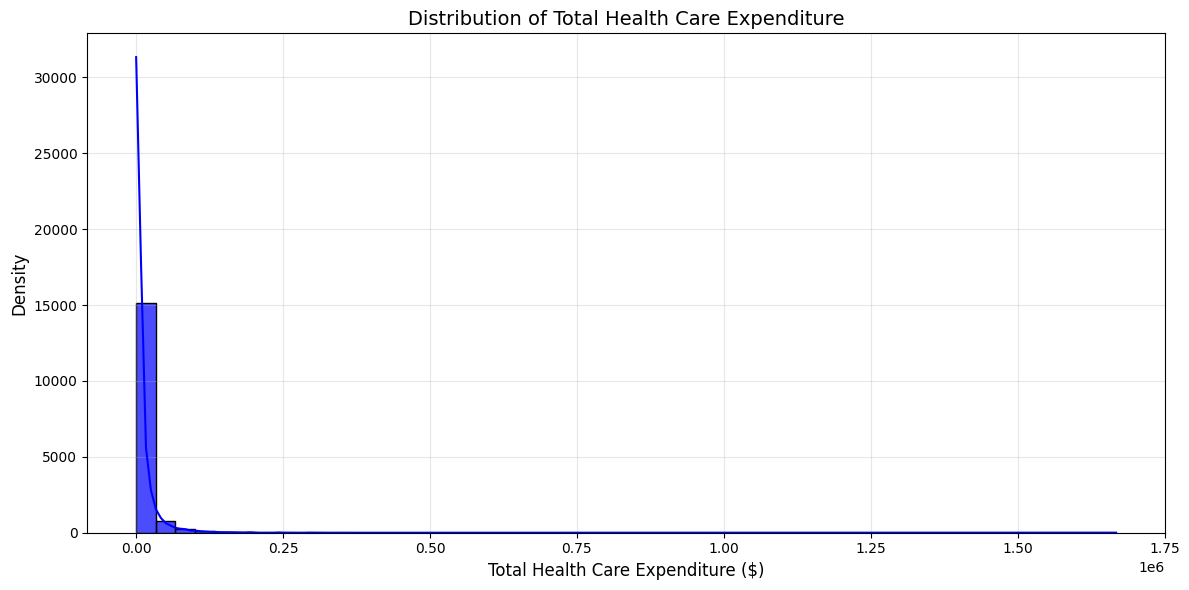

In [ ]:
# Plot the distribution of Total_Health_Care_Expenditure
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x="Total_Health_Care_Expenditure",
    kde=True,
    bins=50,
    color="blue",
    alpha=0.7
)

# Customize the plot
plt.title("Distribution of Total Health Care Expenditure", fontsize=14)
plt.xlabel("Total Health Care Expenditure ($)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

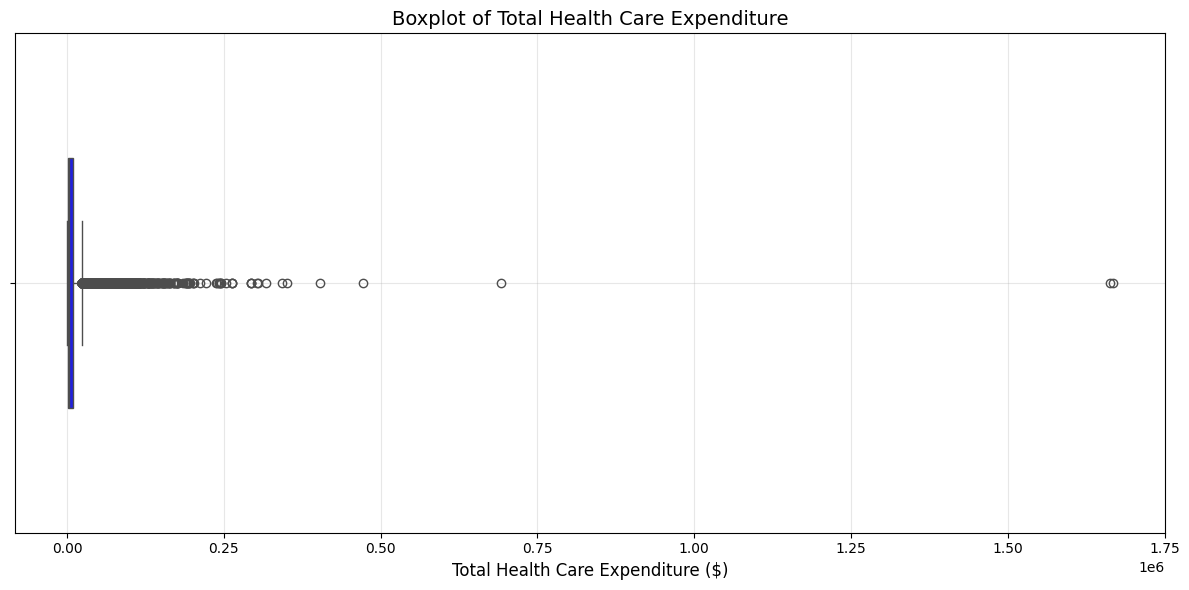

In [ ]:
# Plot a boxplot for Total_Health_Care_Expenditure to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x="Total_Health_Care_Expenditure",
    color="blue",
    width=0.5
)

# Customize the plot
plt.title("Boxplot of Total Health Care Expenditure", fontsize=14)
plt.xlabel("Total Health Care Expenditure ($)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


 - We will use z-score method to remove outliers in Total Health Care Expenditure

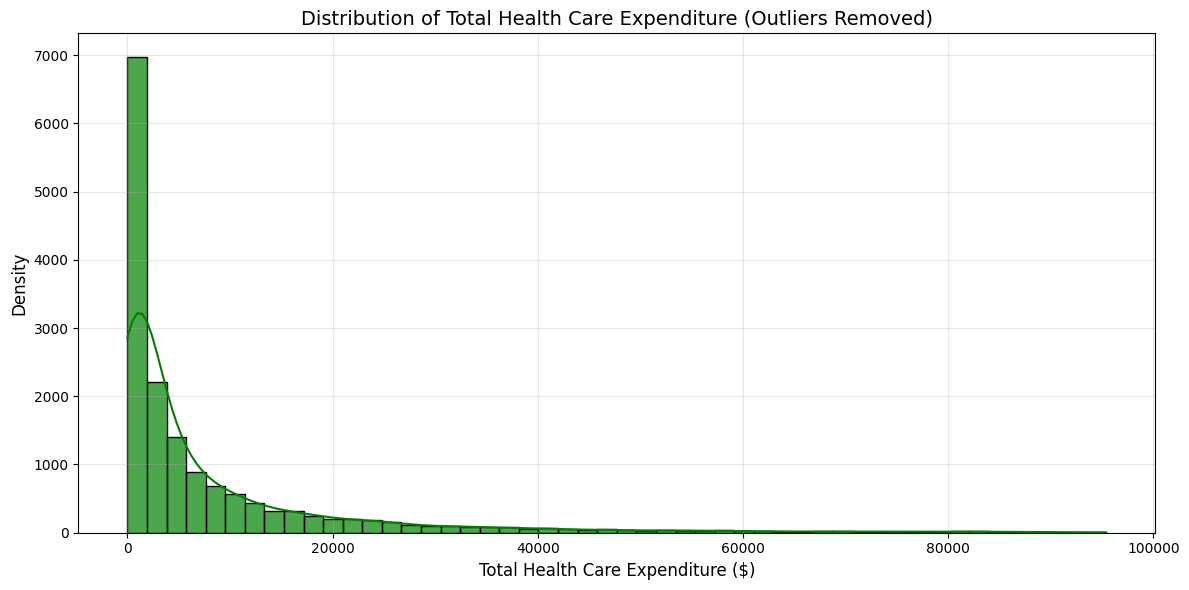

In [ ]:
from scipy.stats import zscore

# Calculate the z-scores for Total_Health_Care_Expenditure
df['z_score'] = zscore(df['Total_Health_Care_Expenditure'])

# Define the threshold for outliers (commonly 3 standard deviations)
threshold = 3

# Filter the dataset to exclude outliers
df_no_outliers = df[abs(df['z_score']) <= threshold]

# Remove the z_score column as it's no longer needed
df_no_outliers = df_no_outliers.drop(columns=['z_score'])

# Plot the distribution after removing outliers
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_no_outliers,
    x="Total_Health_Care_Expenditure",
    kde=True,
    bins=50,
    color="green",
    alpha=0.7
)

# Customize the plot
plt.title("Distribution of Total Health Care Expenditure (Outliers Removed)", fontsize=14)
plt.xlabel("Total Health Care Expenditure ($)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


 - We will perform log transformation on the total expenditure

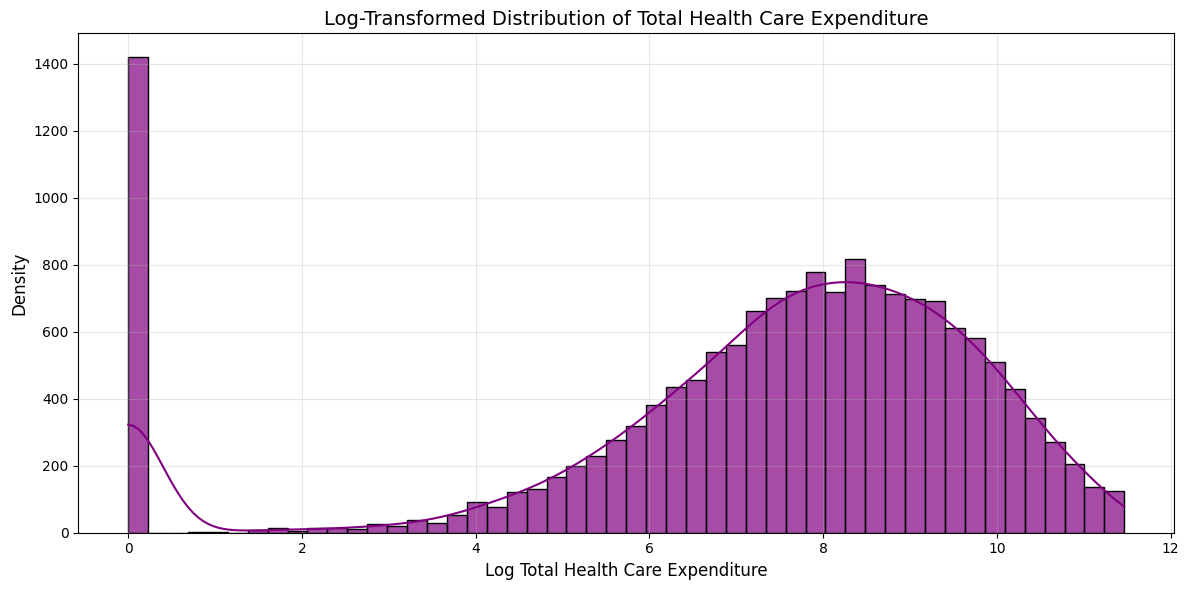

In [ ]:
# Reimporting numpy for transformations
import numpy as np

# Apply log transformation to the Total_Health_Care_Expenditure column
df_no_outliers["Log_Total_Health_Care_Expenditure"] = np.log1p(df_no_outliers["Total_Health_Care_Expenditure"])

# Plot the distribution after log transformation
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_no_outliers,
    x="Log_Total_Health_Care_Expenditure",
    kde=True,
    bins=50,
    color="purple",
    alpha=0.7
)

# Customize the plot
plt.title("Log-Transformed Distribution of Total Health Care Expenditure", fontsize=14)
plt.xlabel("Log Total Health Care Expenditure", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
df_no_outliers.shape

(16087, 57)

<ipython-input-19-ebd5e0858a32>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_nonzero["Log_Total_Health_Care_Expenditure"] = np.log1p(df_no_outliers_nonzero["Total_Health_Care_Expenditure"])


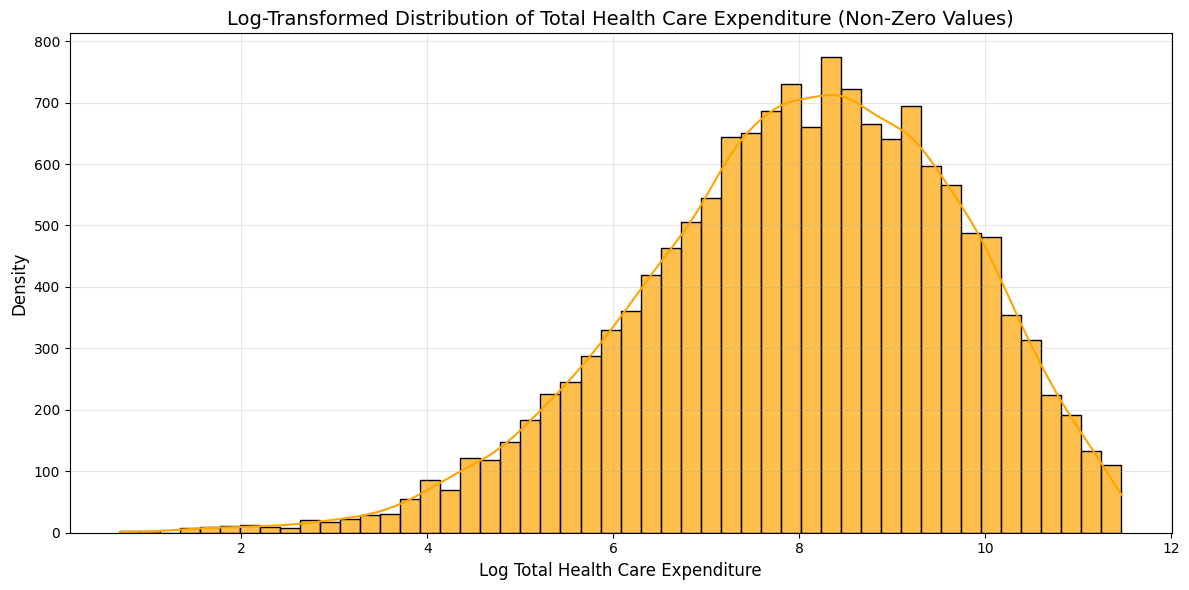

In [ ]:
## We will drop zero values and re-plot

# Drop rows where Total_Health_Care_Expenditure is 0
df_no_outliers_nonzero = df_no_outliers[df_no_outliers["Total_Health_Care_Expenditure"] > 0]

# Reapply log transformation to the dataset after dropping 0 values
df_no_outliers_nonzero["Log_Total_Health_Care_Expenditure"] = np.log1p(df_no_outliers_nonzero["Total_Health_Care_Expenditure"])

# Plot the distribution after dropping 0 values and applying log transformation
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_no_outliers_nonzero,
    x="Log_Total_Health_Care_Expenditure",
    kde=True,
    bins=50,
    color="orange",
    alpha=0.7
)

# Customize the plot
plt.title("Log-Transformed Distribution of Total Health Care Expenditure (Non-Zero Values)", fontsize=14)
plt.xlabel("Log Total Health Care Expenditure", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
df_no_outliers_nonzero.shape

(14667, 57)

### Dropping all type of payment, Expenditure_Rank and financial_burden_percentage_on_income

 -
 - 'Total_Amt_Paid_Private_Insurance',
 - 'Total_Amt_Paid_Public_Insurance',
 - 'Total_Amt_Paid_Out_of_pocket'

 - Expenditure_Rank
 - financial_burden_percentage_on_income

In [ ]:
df=df_no_outliers_nonzero.copy()

In [ ]:
df.drop(columns=['Total_Amt_Paid_Private_Insurance',
        'Total_Amt_Paid_Public_Insurance',
       'Total_Amt_Paid_Out_of_pocket','Expenditure_Rank','financial_burden_percentage_on_income'], inplace=True)


In [ ]:
##Before model building we will be dropping all id columsn and unrelated non-numeric columns(if any)


id_columns = ["Panel_Encrypted_DU_ID", "Person_Number", "Person_ID", "Panel_Number"]
df = df.drop(columns=id_columns)

In [ ]:
df.columns

Index(['Age', 'Sex', 'Wage_Income', 'Family_Total_Income', 'High_BP_Diagnosis',
       'Coronary_Hrt_Disease_Diagnosis', 'Angina_Diagnosis',
       'Heart_Attack_Diagnosis', 'Other_Heart_Disease_Diagnosis',
       'Stroke_Diagnosis', 'Emphysema_Diagnosis', 'High_Cholesterol_Diagnosis',
       'Cancer_Diagnosis', 'Arthritis_Diagnosis', 'Diabetes_Diagnosis',
       'Asthma_Diagnosis', 'Employment_Status', 'Total_Income',
       'Unemployment_Imputation_Flag', 'Unemployment_Comp_Income',
       'Insurance_Coverage_Status', 'Uninsured_Status',
       'Total_Health_Care_Expenditure', 'Total_Health_Care_Charges_Excl_Rx',
       'Office_Based_Visits', 'Outpatient_Visits', 'ER_Visits',
       'Hospital_Discharges', 'Hospital_Stay_Nights',
       'Total_Prescription_Expenditure', 'Total_Office_Based_Expenditure',
       'Total_Outpatient_Fac_and_Dr_Expenditure',
       'Total_Outpatient_Facility_Expenditure',
       'Total_Outpatient_Provider_Expenditure',
       'Total_Outpatient_Physician_Fac

### Calculating Variance Inflation factor(VIF) for the variables.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant### VIF calculation

In [ ]:
## We will drop the target variable before calculating VIF

df_vif = df.drop(columns=["Total_Health_Care_Expenditure","Log_Total_Health_Care_Expenditure"]).copy()



In [ ]:
df_vif.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14667 entries, 1 to 16275
Data columns (total 46 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Age                                              14667 non-null  int64  
 1   Sex                                              14667 non-null  int64  
 2   Wage_Income                                      14667 non-null  int64  
 3   Family_Total_Income                              14667 non-null  int64  
 4   High_BP_Diagnosis                                14667 non-null  float64
 5   Coronary_Hrt_Disease_Diagnosis                   14667 non-null  float64
 6   Angina_Diagnosis                                 14667 non-null  float64
 7   Heart_Attack_Diagnosis                           14667 non-null  float64
 8   Other_Heart_Disease_Diagnosis                    14667 non-null  float64
 9   Stroke_Diagnosis                 

In [ ]:

# Function to calculate VIF
def calculate_vif(dataframe):
    X = add_constant(dataframe)
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data[vif_data['Feature'] != 'const']


In [ ]:
# Iteratively remove features with high VIF
threshold = 10  # Set your threshold, e.g., 5 or 10
high_vif_features = True


In [ ]:
### VIF for all the features

vif_data = calculate_vif(df_vif)
vif_data

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
1,Age,3.151355
2,Sex,1.087925
3,Wage_Income,6.309415
4,Family_Total_Income,2.337658
5,High_BP_Diagnosis,inf
6,Coronary_Hrt_Disease_Diagnosis,inf
7,Angina_Diagnosis,inf
8,Heart_Attack_Diagnosis,inf
9,Other_Heart_Disease_Diagnosis,inf
10,Stroke_Diagnosis,inf


 -
Variance Inflation Factor (VIF) is a measure used to detect multicollinearity in a dataset, which occurs when independent variables are highly correlated with each other.

    - Low VIF (<5): we can consider these variables
    - High VIF (>5): Variables with high VIF values may need to be removed or combined with other predictors, especially if they are strongly correlated.

    Here we will be dropping all high vif variables before building model

In [ ]:
while high_vif_features:
    vif_data = calculate_vif(df_vif)
    max_vif = vif_data['VIF'].max()
    if max_vif > threshold:
        # Drop the feature with the highest VIF
        feature_to_drop = vif_data.loc[vif_data['VIF'].idxmax(), 'Feature']
        print(f"Dropping feature '{feature_to_drop}' with VIF: {max_vif}")
        df_vif = df_vif.drop(columns=[feature_to_drop])
    else:
        high_vif_features = False  # All features are below the threshold

# Displaying the remaining features and their VIF values
final_vif_data = calculate_vif(df_vif)
print(final_vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping feature 'High_BP_Diagnosis' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping feature 'Coronary_Hrt_Disease_Diagnosis' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping feature 'Total_Outpatient_Fac_and_Dr_Expenditure' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping feature 'Total_ER_Facility_and_Dr_Expenditure' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping feature 'Total_Inpatient_Hospital_Expenditure' with VIF: inf
Dropping feature 'Total_Inpatient_Expenditure' with VIF: 9709999293.61344
Dropping feature 'Total_Outpatient_Expenditure' with VIF: 3049170985.3242188
Dropping feature 'Total_ER_Expenditure' with VIF: 295973225.1443521
Dropping feature 'comorbidity_count' with VIF: 16.509758786028026
                                            Feature       VIF
1                                               Age  2.994857
2                                               Sex  1.082491
3                                       Wage_Income  6.307399
4                               Family_Total_Income  2.327761
5                                  Angina_Diagnosis  2.099168
6                            Heart_Attack_Diagnosis  3.548451
7                     Other_Heart_Disease_Diagnosis  1.168362
8                                  Stroke_Diagnosis  2.490520
9                               Emphysema_Diagnosis  1.666472
10                       

In [ ]:
# Selecting only the features from final_vif_data for the correlation matrix
final_features = final_vif_data['Feature'].tolist()
df_final_vif = df[final_features]



In [ ]:
#displaying final_features
final_features

['Age',
 'Sex',
 'Wage_Income',
 'Family_Total_Income',
 'Angina_Diagnosis',
 'Heart_Attack_Diagnosis',
 'Other_Heart_Disease_Diagnosis',
 'Stroke_Diagnosis',
 'Emphysema_Diagnosis',
 'High_Cholesterol_Diagnosis',
 'Cancer_Diagnosis',
 'Arthritis_Diagnosis',
 'Diabetes_Diagnosis',
 'Asthma_Diagnosis',
 'Employment_Status',
 'Total_Income',
 'Unemployment_Imputation_Flag',
 'Unemployment_Comp_Income',
 'Insurance_Coverage_Status',
 'Uninsured_Status',
 'Total_Health_Care_Charges_Excl_Rx',
 'Office_Based_Visits',
 'Outpatient_Visits',
 'ER_Visits',
 'Hospital_Discharges',
 'Hospital_Stay_Nights',
 'Total_Prescription_Expenditure',
 'Total_Office_Based_Expenditure',
 'Total_Outpatient_Facility_Expenditure',
 'Total_Outpatient_Provider_Expenditure',
 'Total_Outpatient_Physician_Facility_Expenditure',
 'Total_Outpatient_Physician_Dr_Expenditure',
 'Total_ER_Facility_Expenditure',
 'Total_ER_Dr_Expenditure',
 'Total_Inpatient_Facility_Expenditure',
 'Total_Inpatient_Doctor_Expenditure',
 'cr

In [ ]:
#comorbidity_count
#final_features+comorbidity_count

In [ ]:
# Keeping only the final VIF-selected features and target variable
selected_features = final_vif_data['Feature'].tolist()
#X = df[selected_features+['comorbidity_count']]
X = df[selected_features]
#y = df['Total_Health_Care_Expenditure']
y = df['Log_Total_Health_Care_Expenditure']

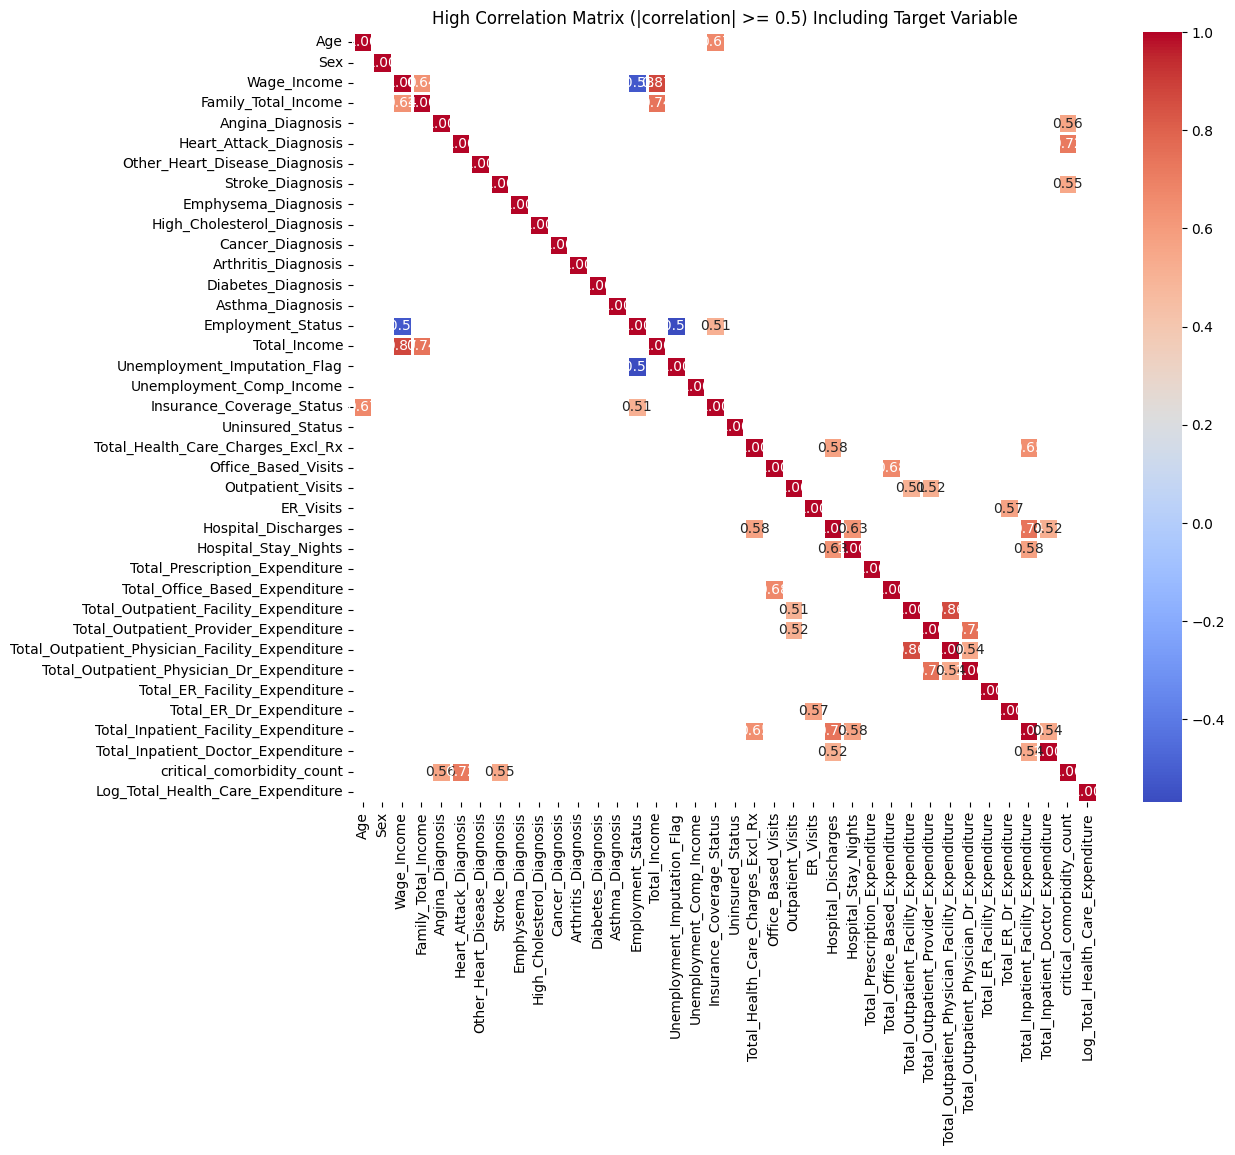

In [ ]:
# Adding the target variable to the final features for correlation analysis
final_features_with_target = final_features + ['Log_Total_Health_Care_Expenditure']
df_final_vif_with_target = df[final_features_with_target]

# Calculating the correlation matrix for the selected features with target variable
correlation_matrix_final_with_target = df_final_vif_with_target.corr()

# Filtering for high correlation values (absolute value >= 0.5)
high_correlation_threshold = 0.5
high_corr_matrix_final_with_target = correlation_matrix_final_with_target[(correlation_matrix_final_with_target >= high_correlation_threshold) |
                                                                          (correlation_matrix_final_with_target <= -high_correlation_threshold)]

# Plotting the heatmap for high correlations including the target variable
plt.figure(figsize=(12, 10))
sns.heatmap(high_corr_matrix_final_with_target, cmap="coolwarm", annot=True, fmt=".2f", cbar=True,
            mask=high_corr_matrix_final_with_target.isnull(), linewidths=0.9)
plt.title("High Correlation Matrix (|correlation| >= 0.5) Including Target Variable")
plt.show()


### Building Predictive models with variables with low VIF.

In [ ]:
# Splitting the dataset into train, test, and validation sets (70% train, 15% validation, 15% test)
# First split: 85% train+validation and 15% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
# Second split: 70% train and 15% validation of the original data
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)


In [ ]:

print ('train data set size ', X_train.shape)
print ('test data set size ', X_test.shape)
print ('validation data set size ', X_val.shape)


train data set size  (10265, 37)
test data set size  (2201, 37)
validation data set size  (2201, 37)


### Base Model 1: Basic Linear Regresion

In [ ]:
# Training a basic linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating on the validation set
y_val_pred = model.predict(X_val)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

print(f"Validation MAE: {mae_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation R-squared: {r2_val}")

# Testing the final model on the test set
y_test_pred = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R-squared: {r2_test}")

Validation MAE: 0.8277117582809433
Validation RMSE: 1.0995584459526138
Validation R-squared: 0.5772650352201095
Test MAE: 0.8405114425130239
Test RMSE: 1.1128919823563133
Test R-squared: 0.5671718317977543


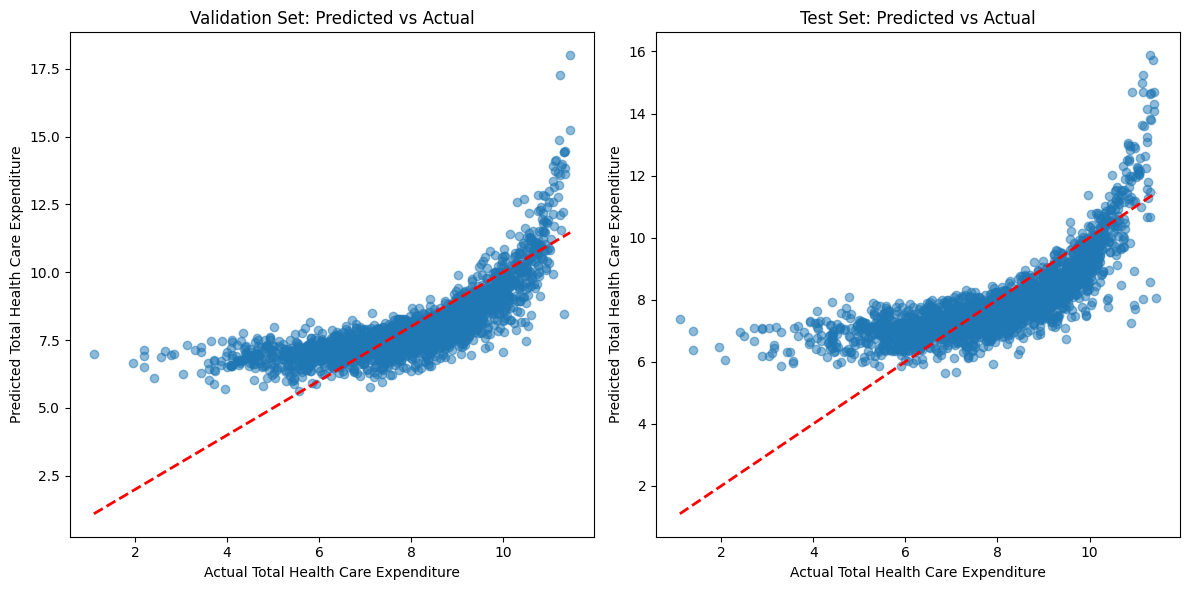

In [ ]:
# Plotting predicted vs. actual values for the validation set
plt.figure(figsize=(12, 6))

# Validation set plot
plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel("Actual Total Health Care Expenditure")
plt.ylabel("Predicted Total Health Care Expenditure")
plt.title("Validation Set: Predicted vs Actual")

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Total Health Care Expenditure")
plt.ylabel("Predicted Total Health Care Expenditure")
plt.title("Test Set: Predicted vs Actual")

plt.tight_layout()
plt.show()

### Model 2 : Linear Regression with Lasso Regularization

 - We will perform Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# Define the Lasso model with a chosen alpha value (regularization strength)
lasso_model = Lasso(alpha=0.01, random_state=42)  # Adjust alpha as needed
lasso_model.fit(X_train_scaled, y_train)



Lasso(alpha=0.01, random_state=42)

In [ ]:
# Evaluating on the validation set
y_val_pred_lasso = lasso_model.predict(X_val_scaled)
mae_val = mean_absolute_error(y_val, y_val_pred_lasso)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred_lasso))
r2_val = r2_score(y_val, y_val_pred_lasso)

print("Validation Metrics for Lasso Regression:")
print(f"Validation MAE: {mae_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation R-squared: {r2_val}")

# Testing the final model on the test set
y_test_pred_lasso = lasso_model.predict(X_test_scaled)
mae_test = mean_absolute_error(y_test, y_test_pred_lasso)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
r2_test = r2_score(y_test, y_test_pred_lasso)

print("\nTest Metrics for Lasso Regression:")
print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R-squared: {r2_test}")


Validation Metrics for Lasso Regression:
Validation MAE: 0.8316794796607367
Validation RMSE: 1.1019970643101036
Validation R-squared: 0.5753878591398103

Test Metrics for Lasso Regression:
Test MAE: 0.8416462285971935
Test RMSE: 1.1131167262104888
Test R-squared: 0.5669969984905763


### Lasso Regression with Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# GridSearch for Lasso Regression
grid_search = GridSearchCV(Lasso(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Train the Lasso model with the best alpha
lasso_model = Lasso(alpha=best_alpha, random_state=42)
lasso_model.fit(X_train_scaled, y_train)


Best alpha: 0.01


Lasso(alpha=0.01, random_state=42)

In [ ]:
# Evaluating on the validation set
y_val_pred_lasso = lasso_model.predict(X_val_scaled)
mae_val = mean_absolute_error(y_val, y_val_pred_lasso)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred_lasso))
r2_val = r2_score(y_val, y_val_pred_lasso)

print("Validation Metrics for Lasso Regression:")
print(f"Validation MAE: {mae_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation R-squared: {r2_val}")

# Testing the final model on the test set
y_test_pred_lasso = lasso_model.predict(X_test_scaled)
mae_test = mean_absolute_error(y_test, y_test_pred_lasso)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
r2_test = r2_score(y_test, y_test_pred_lasso)

print("\nTest Metrics for Lasso Regression:")
print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R-squared: {r2_test}")

Validation Metrics for Lasso Regression:
Validation MAE: 0.8316794796607367
Validation RMSE: 1.1019970643101036
Validation R-squared: 0.5753878591398103

Test Metrics for Lasso Regression:
Test MAE: 0.8416462285971935
Test RMSE: 1.1131167262104888
Test R-squared: 0.5669969984905763


In [ ]:
X_test.columns

Index(['Age', 'Sex', 'Wage_Income', 'Family_Total_Income', 'Angina_Diagnosis',
       'Heart_Attack_Diagnosis', 'Other_Heart_Disease_Diagnosis',
       'Stroke_Diagnosis', 'Emphysema_Diagnosis', 'High_Cholesterol_Diagnosis',
       'Cancer_Diagnosis', 'Arthritis_Diagnosis', 'Diabetes_Diagnosis',
       'Asthma_Diagnosis', 'Employment_Status', 'Total_Income',
       'Unemployment_Imputation_Flag', 'Unemployment_Comp_Income',
       'Insurance_Coverage_Status', 'Uninsured_Status',
       'Total_Health_Care_Charges_Excl_Rx', 'Office_Based_Visits',
       'Outpatient_Visits', 'ER_Visits', 'Hospital_Discharges',
       'Hospital_Stay_Nights', 'Total_Prescription_Expenditure',
       'Total_Office_Based_Expenditure',
       'Total_Outpatient_Facility_Expenditure',
       'Total_Outpatient_Provider_Expenditure',
       'Total_Outpatient_Physician_Facility_Expenditure',
       'Total_Outpatient_Physician_Dr_Expenditure',
       'Total_ER_Facility_Expenditure', 'Total_ER_Dr_Expenditure',
      

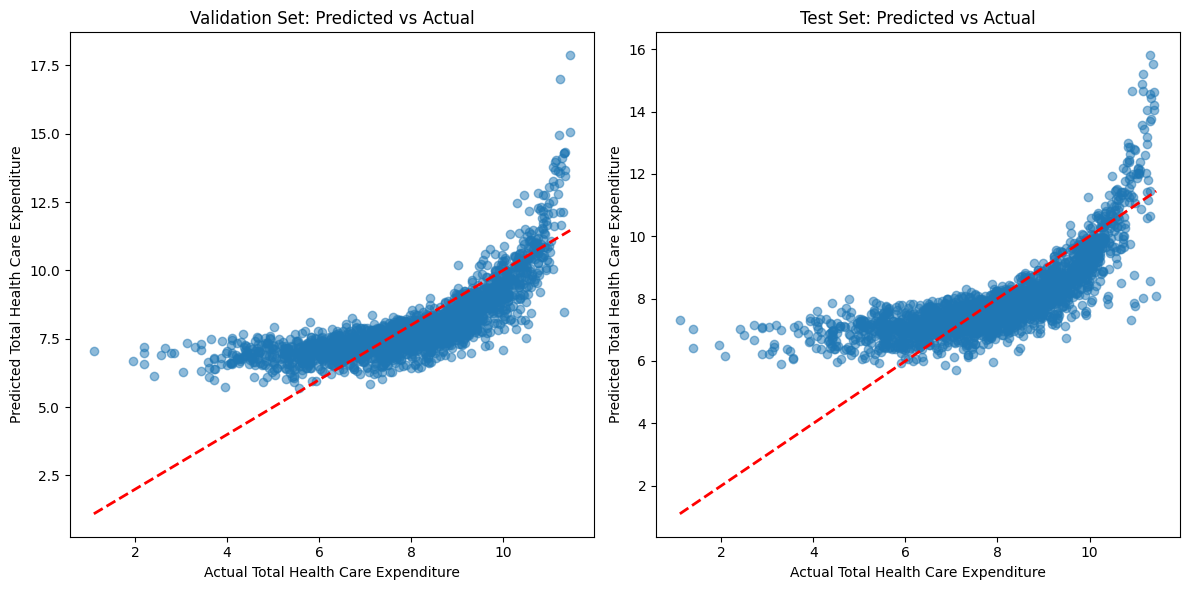

In [ ]:
# Plotting predicted vs. actual values for the validation set
plt.figure(figsize=(12, 6))

# Validation set plot
plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred_lasso, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel("Actual Total Health Care Expenditure")
plt.ylabel("Predicted Total Health Care Expenditure")
plt.title("Validation Set: Predicted vs Actual")

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Total Health Care Expenditure")
plt.ylabel("Predicted Total Health Care Expenditure")
plt.title("Test Set: Predicted vs Actual")

plt.tight_layout()
plt.show()

In [ ]:
## Feature importance


# Get coefficients
coefficients = lasso_model.coef_
feature_names = X_train.columns

# Create a DataFrame
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top features
print(feature_importance)

                                            Feature  Coefficient  \
26                   Total_Prescription_Expenditure     0.518050   
27                   Total_Office_Based_Expenditure     0.315845   
21                              Office_Based_Visits     0.248379   
34             Total_Inpatient_Facility_Expenditure     0.231668   
19                                 Uninsured_Status     0.153478   
0                                               Age     0.152052   
23                                        ER_Visits     0.145788   
24                              Hospital_Discharges     0.139695   
28            Total_Outpatient_Facility_Expenditure     0.132958   
12                               Diabetes_Diagnosis     0.100287   
11                              Arthritis_Diagnosis     0.090420   
30  Total_Outpatient_Physician_Facility_Expenditure     0.088596   
15                                     Total_Income     0.082282   
14                                Employment_Sta

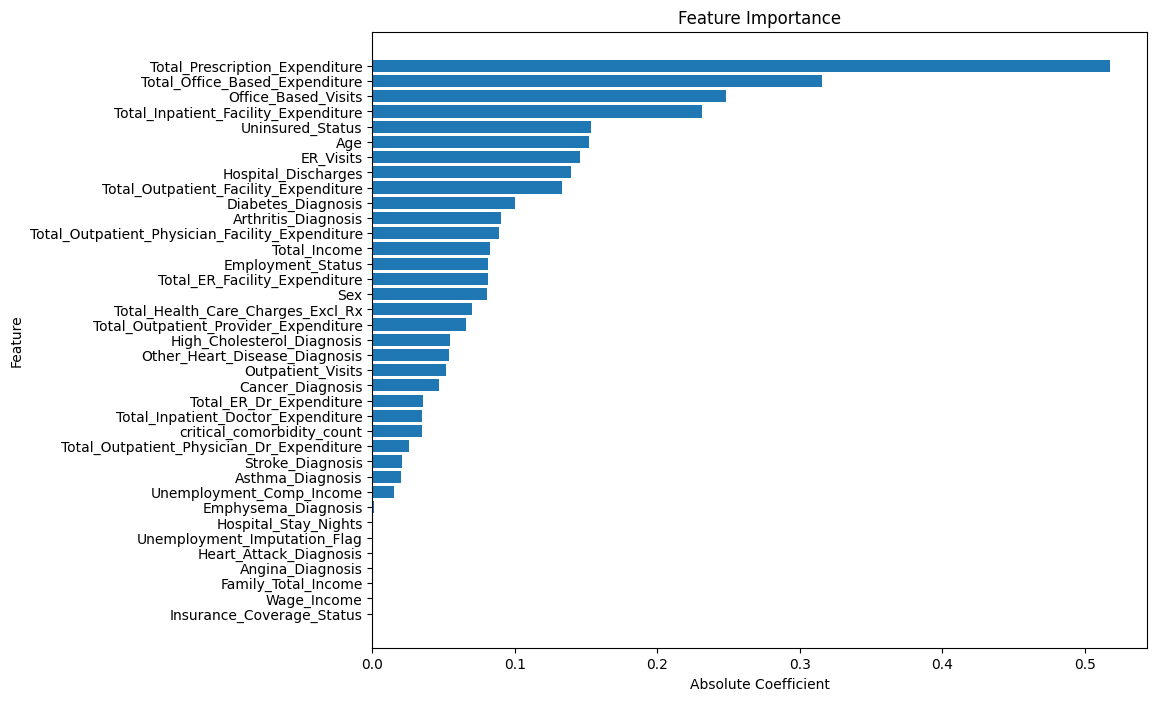

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


### Model 3 : Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the Ridge model with a chosen alpha value (regularization strength)
ridge_model = Ridge(alpha=10.0, random_state=42)  # Adjust alpha as needed
ridge_model.fit(X_train_scaled, y_train)

# Evaluating on the validation set
y_val_pred = ridge_model.predict(X_val_scaled)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

print("Validation Metrics for Ridge Regression:")
print(f"Validation MAE: {mae_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation R-squared: {r2_val}")

# Testing the final model on the test set
y_test_pred = ridge_model.predict(X_test_scaled)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Metrics for Ridge Regression:")
print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R-squared: {r2_test}")


Validation Metrics for Ridge Regression:
Validation MAE: 0.8277745735965824
Validation RMSE: 1.0995896374500045
Validation R-squared: 0.5772410511861161

Test Metrics for Ridge Regression:
Test MAE: 0.8405452774463811
Test RMSE: 1.1128832461289715
Test R-squared: 0.5671786271929871


### Ridge regression with hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values
param_grid = {'alpha': [150,160,170,180]}

# GridSearch for Ridge Regression
grid_search = GridSearchCV(Ridge(random_state=42), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Train the Ridge model with the best alpha
ridge_model = Ridge(alpha=best_alpha, random_state=42)
ridge_model.fit(X_train_scaled, y_train)



Best alpha: 180


Ridge(alpha=180, random_state=42)

In [ ]:
# Evaluating on the validation set
y_val_pred = ridge_model.predict(X_val_scaled)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

print("Validation Metrics for Ridge Regression:")
print(f"Validation MAE: {mae_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation R-squared: {r2_val}")

# Testing the final model on the test set
y_test_pred = ridge_model.predict(X_test_scaled)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Metrics for Ridge Regression:")
print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R-squared: {r2_test}")


Validation Metrics for Ridge Regression:
Validation MAE: 0.8288615792770435
Validation RMSE: 1.100149193127019
Validation R-squared: 0.5768106772520796

Test Metrics for Ridge Regression:
Test MAE: 0.8412489583521544
Test RMSE: 1.1128402547952552
Test R-squared: 0.5672120668349836


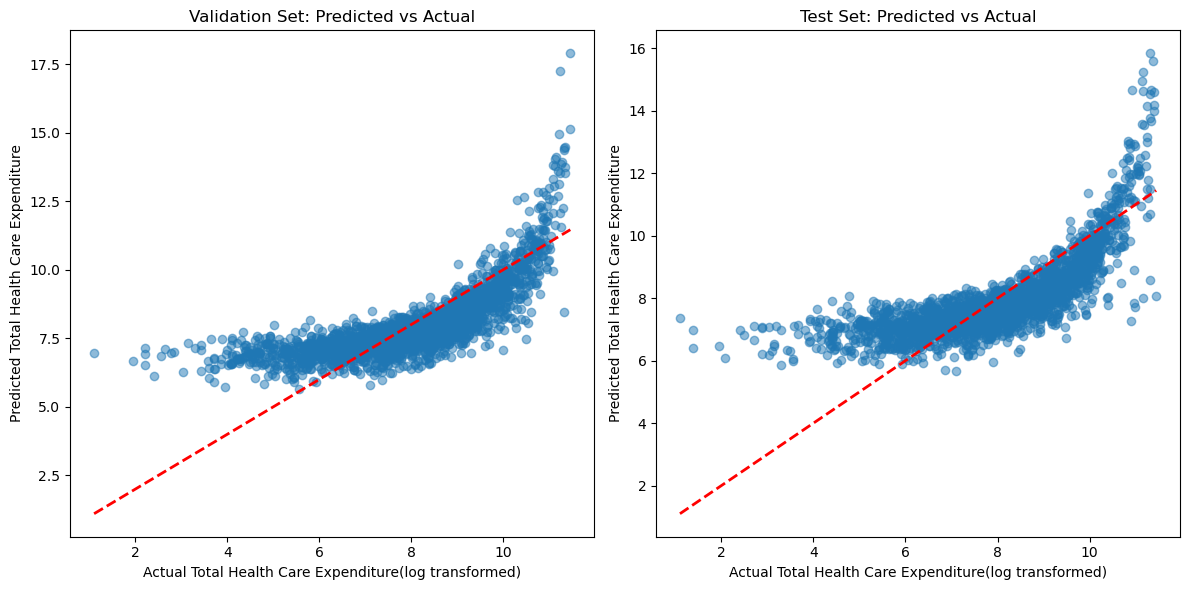

In [ ]:
# Plotting predicted vs. actual values for the validation set
plt.figure(figsize=(12, 6))

# Validation set plot
plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel("Actual Total Health Care Expenditure(log transformed)")
plt.ylabel("Predicted Total Health Care Expenditure")
plt.title("Validation Set: Predicted vs Actual")

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Total Health Care Expenditure(log transformed)")
plt.ylabel("Predicted Total Health Care Expenditure")
plt.title("Test Set: Predicted vs Actual")

plt.tight_layout()
plt.show()

In [ ]:

## Feature importance


# Get coefficients
coefficients = ridge_model.coef_
feature_names = X_train.columns

# Create a DataFrame
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top features
print(feature_importance)

                                            Feature  Coefficient  \
26                   Total_Prescription_Expenditure     0.512434   
27                   Total_Office_Based_Expenditure     0.314887   
21                              Office_Based_Visits     0.247959   
34             Total_Inpatient_Facility_Expenditure     0.232700   
19                                 Uninsured_Status     0.156867   
24                              Hospital_Discharges     0.150253   
23                                        ER_Visits     0.142720   
15                                     Total_Income     0.140322   
0                                               Age     0.140320   
28            Total_Outpatient_Facility_Expenditure     0.127503   
12                               Diabetes_Diagnosis     0.109181   
30  Total_Outpatient_Physician_Facility_Expenditure     0.096313   
11                              Arthritis_Diagnosis     0.092948   
1                                               

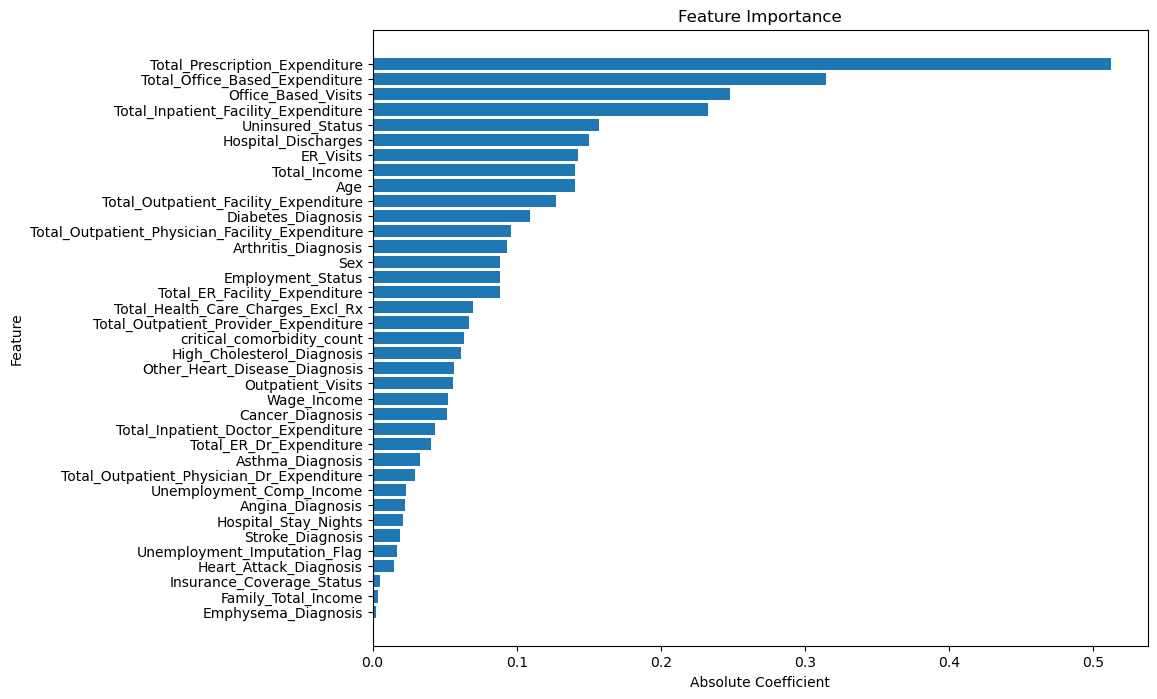

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Assuming `feature_importance` DataFrame is available and structured with "Feature" and "Abs_Coefficient" columns

# Filter and select the top 10 most important features
top_10_features = feature_importance.nlargest(10, 'Abs_Coefficient')

# Plotting the top 10 features
plt.figure(figsize=(10, 8))
plt.barh(top_10_features['Feature'], top_10_features['Abs_Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.tight_layout()
plt.show()


### Model 4 : SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np



# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



 - Base Model : SVR

In [ ]:

# Train the SVR model with default hyperparameters
svr = SVR()
svr.fit(X_train_scaled, y_train)


# Evaluating on the validation set
y_val_pred = svr.predict(X_val_scaled)


mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

print("Validation Metrics for SVR model:")
print(f"Validation MAE: {mae_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation R-squared: {r2_val}")

# Predict on the test set
y_test_pred = svr.predict(X_test_scaled)

# Evaluate the SVR model
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# Output the evaluation metrics
print("\nTest Metrics for Base SVR model:")
print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R-squared: {r2_test}")

Validation Metrics for SVR model:
Validation MAE: 0.5022581550378719
Validation RMSE: 0.7662517141066248
Validation R-squared: 0.7947068537236323

Test Metrics for Base SVR model:
Test MAE: 0.5054301172291932
Test RMSE: 0.783810711368685
Test R-squared: 0.7853000824303735


### Hyperparameter Tuned SVR model

In [ ]:

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define the parameter grid
param_grid = {
    'C': [100, 120],
    'epsilon': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

# Perform grid search
svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


# Evaluate the best model - on validation set
best_svr = grid_search.best_estimator_
y_val_pred = best_svr.predict(X_val_scaled)
r2_val = r2_score(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
print("Validation Metrics for Hyperparameter tuned SVR model:")
print(f"Validation MAE: {mae_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation R-squared: {r2_val}")

# Evaluate the best model - on test set
best_svr = grid_search.best_estimator_
y_test_pred = best_svr.predict(X_test_scaled)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test Metrics for Hyperparameter tuned SVR model:")
print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R-squared: {r2_test}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 100, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Validation Metrics for Hyperparameter tuned SVR model:
Validation MAE: 0.53597778739046
Validation RMSE: 0.7661540915744212
Validation R-squared: 0.7947591601909741
Test Metrics for Hyperparameter tuned SVR model:
Test MAE: 0.5568159302366308
Test RMSE: 0.7948659542758024
Test R-squared: 0.7792009091994889


In [ ]:
# import shap

# explainer = shap.KernelExplainer(best_svr.predict, X_train_scaled)
# shap_values = explainer.shap_values(X_test_scaled)

# # Plot feature importance
# shap.summary_plot(shap_values, X_test_scaled, feature_names=X_train.columns)


In [ ]:

# Evaluate on the validation set
y_val_pred = best_svr.predict(X_val_scaled)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

print("Validation Metrics for SVR:")
print(f"Validation MAE: {mae_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation R-squared: {r2_val}")

# Evaluate on the test set
y_test_pred = best_svr.predict(X_test_scaled)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Metrics for SVR:")
print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R-squared: {r2_test}")

Validation Metrics for SVR:
Validation MAE: 0.53597778739046
Validation RMSE: 0.7661540915744212
Validation R-squared: 0.7947591601909741

Test Metrics for SVR:
Test MAE: 0.5568159302366308
Test RMSE: 0.7948659542758024
Test R-squared: 0.7792009091994889


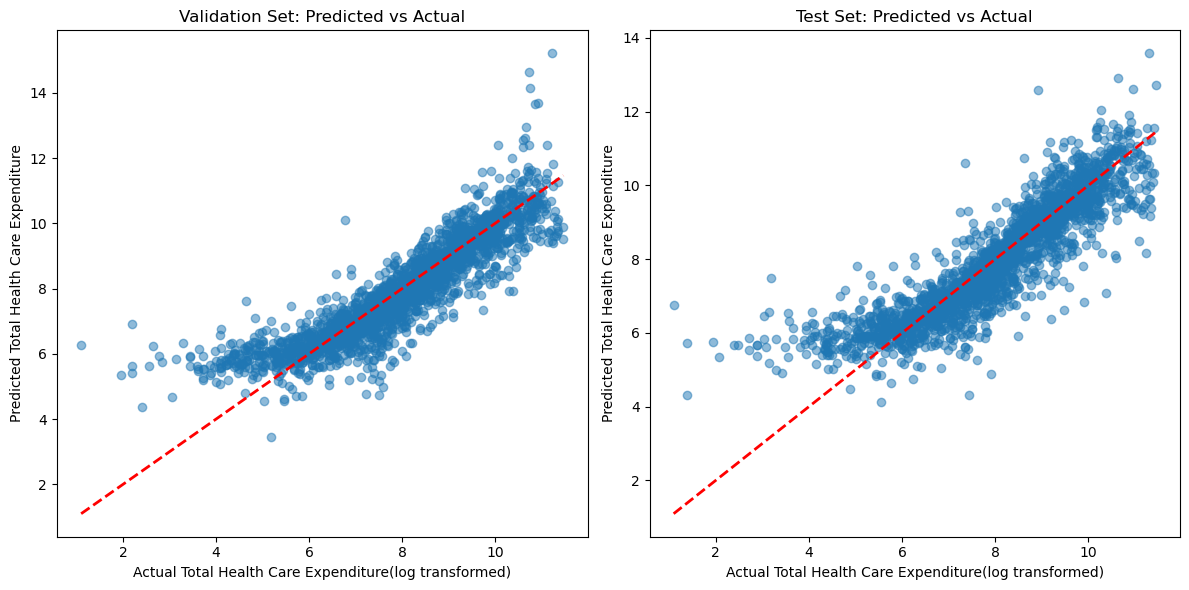

In [ ]:
# Plotting predicted vs. actual values for the validation set
plt.figure(figsize=(12, 6))

# Validation set plot
plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel("Actual Total Health Care Expenditure(log transformed)")
plt.ylabel("Predicted Total Health Care Expenditure")
plt.title("Validation Set: Predicted vs Actual")

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Total Health Care Expenditure(log transformed)")
plt.ylabel("Predicted Total Health Care Expenditure")
plt.title("Test Set: Predicted vs Actual")

plt.tight_layout()
plt.show()

### Model 5 : Xtreme Gradient Boost(XGB)

In [ ]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric="rmse"
)

# Train the model with validation set
xgb_model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_val_scaled, y_val)],
    verbose=False
)

# Make predictions
y_val_pred = xgb_model.predict(X_val_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

# Evaluate the XGB model - validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

print("Validation Metrics for XGB model:")
print(f"Validation MAE: {mae_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation R-squared: {r2_val}")


# Evaluate the XGB model - test set
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# Output the evaluation metrics
print("\nTest Metrics for Base XGB model:")
print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R-squared: {r2_test}")

Validation Metrics for XGB model:
Validation MAE: 0.22115842715319706
Validation RMSE: 0.33836670069462
Validation R-squared: 0.9599680481142399

Test Metrics for Base XGB model:
Test MAE: 0.22732827383358195
Test RMSE: 0.33910562669122085
Test R-squared: 0.9598135649653265


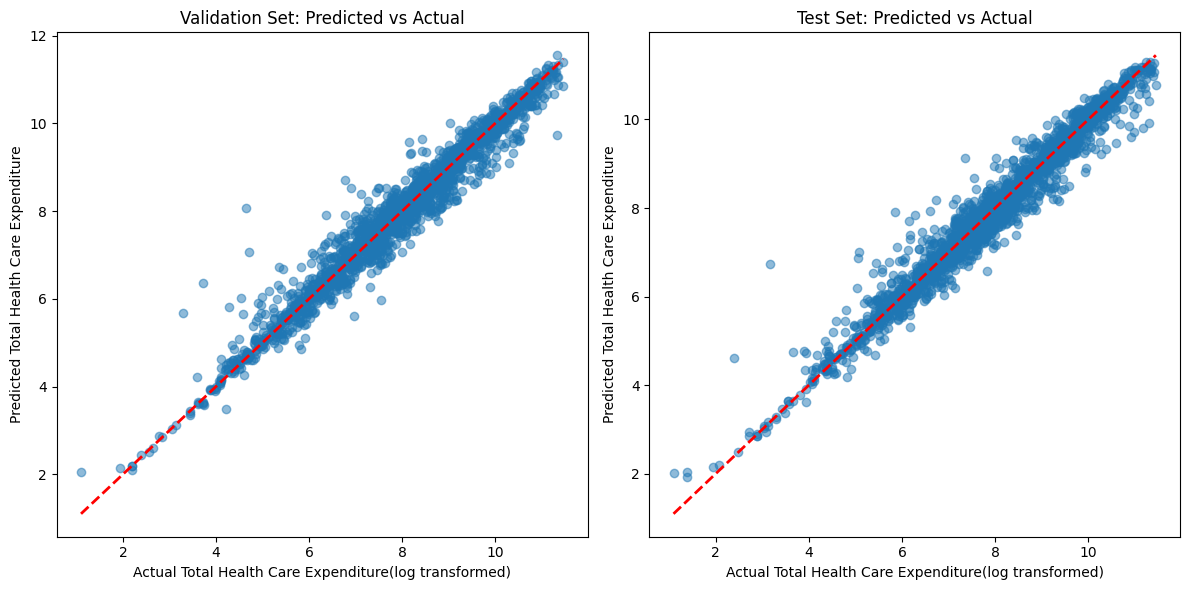

In [ ]:
# Plotting predicted vs. actual values for the validation set
plt.figure(figsize=(12, 6))

# Validation set plot
plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel("Actual Total Health Care Expenditure(log transformed)")
plt.ylabel("Predicted Total Health Care Expenditure")
plt.title("Validation Set: Predicted vs Actual")

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Total Health Care Expenditure(log transformed)")
plt.ylabel("Predicted Total Health Care Expenditure")
plt.title("Test Set: Predicted vs Actual")

plt.tight_layout()
plt.show()

In [ ]:
# Get feature importances
importances = xgb_model.feature_importances_

feature_names = X_train.columns

# Create a DataFrame
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top features
print(feature_importance)

                                            Feature  Coefficient  \
26                   Total_Prescription_Expenditure     0.518050   
27                   Total_Office_Based_Expenditure     0.315845   
21                              Office_Based_Visits     0.248379   
34             Total_Inpatient_Facility_Expenditure     0.231668   
19                                 Uninsured_Status     0.153478   
0                                               Age     0.152052   
23                                        ER_Visits     0.145788   
24                              Hospital_Discharges     0.139695   
28            Total_Outpatient_Facility_Expenditure     0.132958   
12                               Diabetes_Diagnosis     0.100287   
11                              Arthritis_Diagnosis     0.090420   
30  Total_Outpatient_Physician_Facility_Expenditure     0.088596   
15                                     Total_Income     0.082282   
14                                Employment_Sta

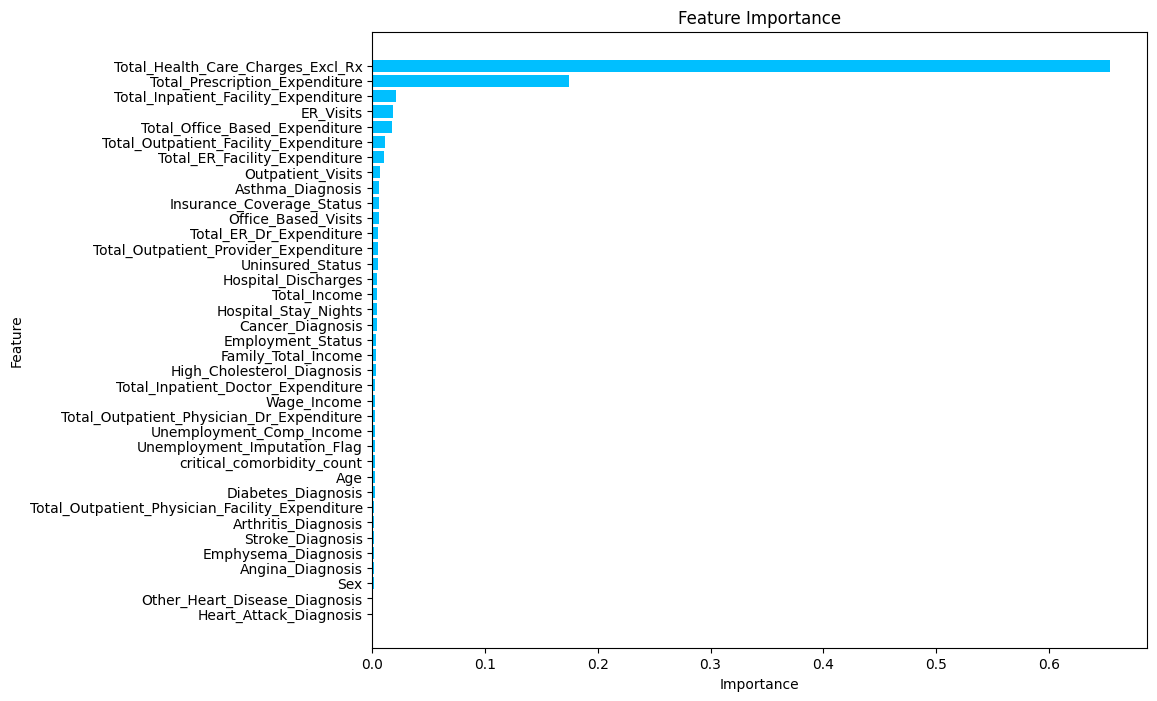

In [ ]:
# Get feature importances and feature names
importances = xgb_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importances
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importances as a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='deepskyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

### Model 6: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_val_pred = rf_model.predict(X_val_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

# Evaluate the XGB model - validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

print("Validation Metrics for RF model:")
print(f"Validation MAE: {mae_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation R-squared: {r2_val}")


# Evaluate the XGB model - test set
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# Output the evaluation metrics
print("\nTest Metrics for Base RF model:")
print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R-squared: {r2_test}")

Validation Metrics for RF model:
Validation MAE: 0.22218204751071938
Validation RMSE: 0.3491427622628571
Validation R-squared: 0.9573776275635524

Test Metrics for Base RF model:
Test MAE: 0.22588116790547783
Test RMSE: 0.34976746021397004
Test R-squared: 0.9572468324966985


### Random Forest with hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid (replacing 'auto' with None for max_features)
param_grid = {
    'n_estimators': [200, 250],
    'max_depth': [15, 20],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt']  # 'auto' is replaced with None
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='r2',  # Optimize for R-squared
                           n_jobs=-1,  # Use all CPU cores
                           verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model on the test set
# Make predictions
y_val_pred = best_model.predict(X_val_scaled)
y_test_pred = best_model.predict(X_test_scaled)


# Evaluate the XGB model - validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

print("Validation Metrics for RF model:")
print(f"Validation MAE: {mae_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation R-squared: {r2_val}")


# Evaluate the XGB model - test set
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# Output the evaluation metrics
print("\nTest Metrics for  RF model:")
print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R-squared: {r2_test}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Validation Metrics for RF model:
Validation MAE: 0.222074473146649
Validation RMSE: 0.34855255003480634
Validation R-squared: 0.9575216086812565

Test Metrics for  RF model:
Test MAE: 0.22663817541118006
Test RMSE: 0.3503455672609368
Test R-squared: 0.9571053880465661


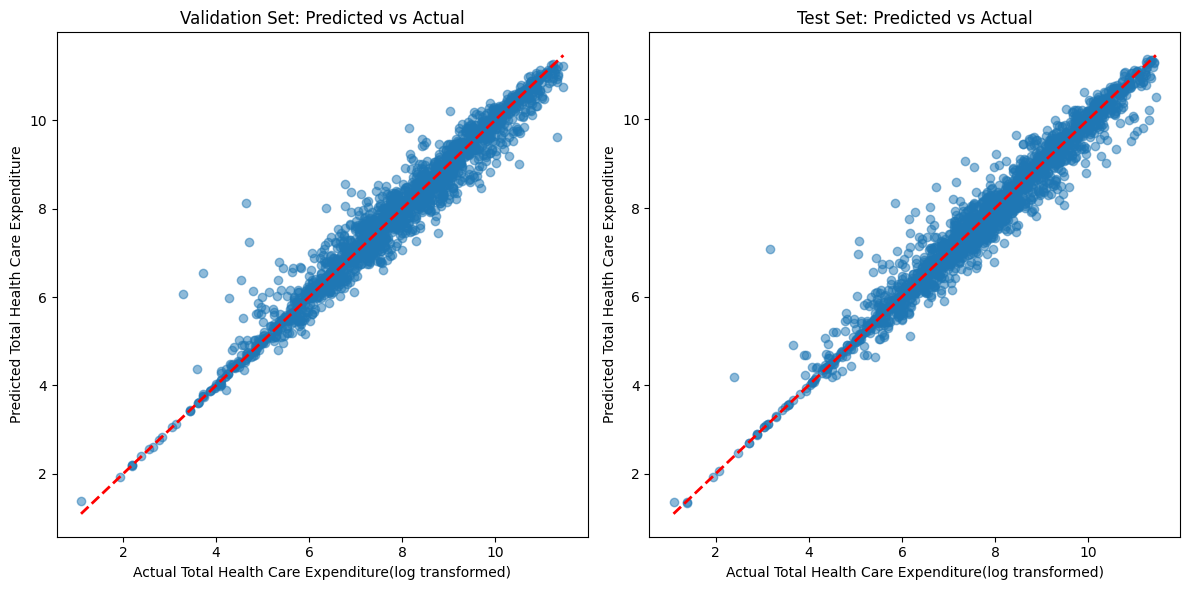

In [ ]:
# Plotting predicted vs. actual values for the validation set
plt.figure(figsize=(12, 6))

# Validation set plot
plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel("Actual Total Health Care Expenditure(log transformed)")
plt.ylabel("Predicted Total Health Care Expenditure")
plt.title("Validation Set: Predicted vs Actual")

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Total Health Care Expenditure(log transformed)")
plt.ylabel("Predicted Total Health Care Expenditure")
plt.title("Test Set: Predicted vs Actual")

plt.tight_layout()
plt.show()

In [ ]:
# Get feature importances
importances = best_model.feature_importances_

feature_names = X_train.columns

# Create a DataFrame
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top features
print(feature_importance)

                                            Feature  Coefficient  \
26                   Total_Prescription_Expenditure     0.518050   
27                   Total_Office_Based_Expenditure     0.315845   
21                              Office_Based_Visits     0.248379   
34             Total_Inpatient_Facility_Expenditure     0.231668   
19                                 Uninsured_Status     0.153478   
0                                               Age     0.152052   
23                                        ER_Visits     0.145788   
24                              Hospital_Discharges     0.139695   
28            Total_Outpatient_Facility_Expenditure     0.132958   
12                               Diabetes_Diagnosis     0.100287   
11                              Arthritis_Diagnosis     0.090420   
30  Total_Outpatient_Physician_Facility_Expenditure     0.088596   
15                                     Total_Income     0.082282   
14                                Employment_Sta

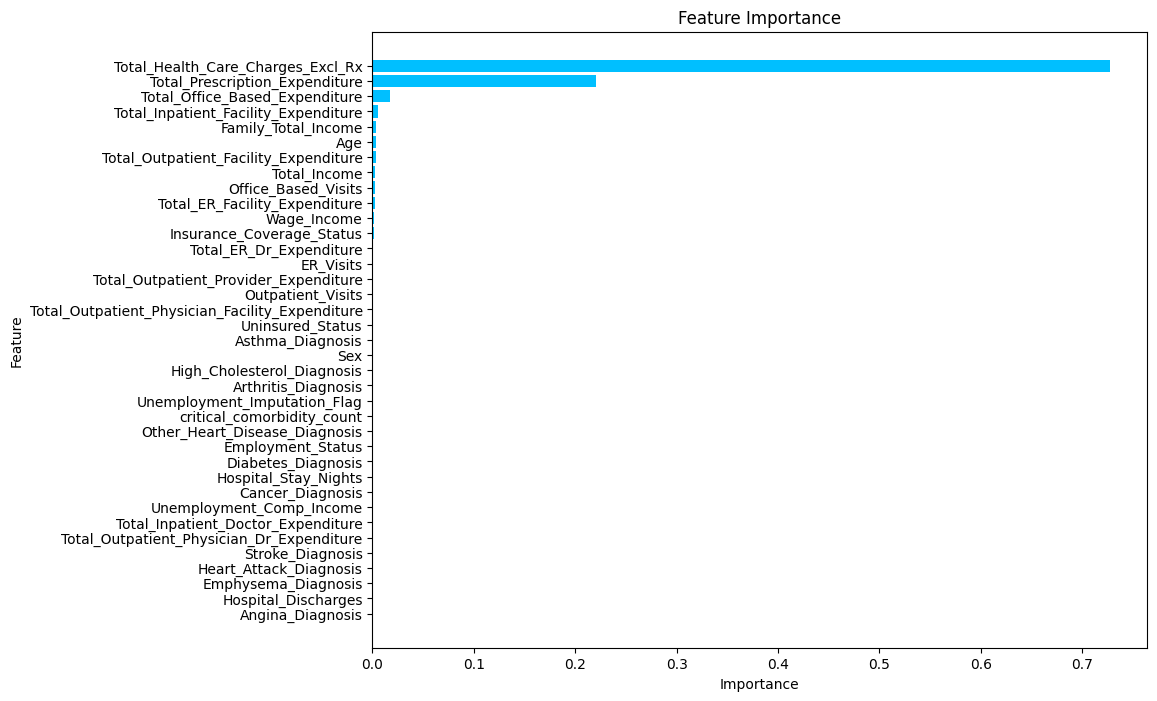

In [ ]:
# Get feature importances and feature names
importances = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importances
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importances as a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='deepskyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()